In [1]:
import numpy as np
import zlib
import lzma
import base64

In [2]:
def sequences_definitons():
    l1 = [
        "1, 2, 3, 4, 5, 6, 7, 8, 9",
        "0, 2, 4, 6, 8, 10, 12",
        "1, 3, 5, 7, 9, 11, 13",
        "101, 103, 105, 107, 109",
        "2, 3, 5, 7, 11, 13, 17, 19, 23",
        "10, 20 ,30 ,40 ,50 ,60",
        "4, 8, 12, 16, 20, 24, 28, 32",
        "3, 6, 9, 12, 15, 18, 21",
        "1, 2, 3",
        "1, 2, 3, 4, 5",
        "2, 4, 6, 8, 10, 12, 14, 16, 18, 20", 
        "3, 6, 9, 12, 15, 18, 21, 24, 27, 30",
        "4, 8, 12, 16, 20, 24, 28, 32, 36, 40",
        "5, 10, 15, 20, 25, 30, 35, 40, 45, 50",
        "6, 12, 18, 24, 30, 36, 42, 48, 54, 60",
        "7, 14, 21, 28, 35, 42, 49, 56, 63, 70",
        "8, 16, 24, 32, 40, 48, 56, 64, 72, 80",
        "9, 18, 27, 36, 45, 54, 63, 72, 81, 90",
        "10, 20, 30, 40, 50, 60, 70, 80, 90, 100",
        "1, 3, 5, 7, 9, 11, 13, 15, 17, 19",
        "2, 4, 6, 8, 10, 12, 14, 16, 18, 20",
        "11, 12, 13, 14, 15, 16, 17, 18, 19, 20",
        "21, 22, 23, 24, 25, 26, 27, 28, 29, 30",
        "31, 32, 33, 34, 35, 36, 37, 38, 39, 40",
        "41, 42, 43, 44, 45, 46, 47, 48, 49, 50",
        "51, 52, 53, 54, 55, 56, 57, 58, 59, 60",
        "61, 62, 63, 64, 65, 66, 67, 68, 69, 70",
        "71, 72, 73, 74, 75, 76, 77, 78, 79, 80",
        "81, 82, 83, 84, 85, 86, 87, 88, 89, 90",
        "91, 92, 93, 94, 95, 96, 97, 98, 99, 100",
        "101, 102, 103, 104, 105, 106, 107, 108, 109, 110",
        "111, 112, 113, 114, 115, 116, 117, 118, 119, 120",
        "121, 122, 123, 124, 125, 126, 127, 128, 129, 130",
        "131, 132, 133, 134, 135, 136, 137, 138, 139, 140",
        "141, 142, 143, 144, 145, 146, 147, 148, 149, 150",
        "151, 152, 153, 154, 155, 156, 157, 158, 159, 160",
        "161, 162, 163, 164, 165, 166, 167, 168, 169, 170",
        "171, 172, 173, 174, 175, 176, 177, 178, 179, 180",
        "181, 182, 183, 184, 185, 186, 187, 188, 189, 190",
        "191, 192, 193, 194, 195, 196, 197, 198, 199, 200",
    ]
    
    l2 = [
        "0, 1, 1, 2, 3, 5, 8, 13",
        "0, 6, 9, 3, 1, 4, 7",
        "0, 0, 0, 0, 0, 0",
        "0, 1, 2, 4, 8, 16",
        "1, 2, 4, 7, 11, 16, 22, 29",
        "1, 1, 1, 2, 3, 4, 6, 9",
        "30, 42, 66, 70, 78, 102",
        "0, 1, 4, 9, 16, 25, 36",
        "0, 1, 8, 27, 64, 125, 216, 343, 512",
        "4, 6, 9, 10, 14, 15, 21, 22, 25, 26",
        "2, 3, 5, 7, 11, 13, 17, 19, 23, 29",
        "1, 1, 2, 3, 5, 8, 13, 21, 34, 55",
        "1, 2, 4, 8, 16, 32, 64, 128, 256, 512",
        "1, 3, 9, 27, 81, 243, 729, 2187, 6561, 19683",
        "1, 4, 9, 16, 25, 36, 49, 64, 81, 100",
        "1, 8, 27, 64, 125, 216, 343, 512, 729, 1000",
        "1, 1, 2, 6, 24, 120, 720, 5040, 40320, 362880",
        "1, 3, 6, 10, 15, 21, 28, 36, 45, 55",
        "2, 1, 3, 4, 7, 11, 18, 29, 47, 76",
        "0, 1, 2, 5, 12, 29, 70, 169, 408, 985",
        "1, 4, 27, 256, 3125, 46656, 823543, 16777216, 387420489, 10000000000",
        "1, 2, 6, 20, 70, 252, 924, 3432, 12870, 48620",
        "2, 3, 5, 7, 11, 13, 17, 19, 23, 29",
        "4, 6, 9, 10, 14, 15, 21, 22, 25, 26",
        "1, 10, 11, 100, 101, 110, 111, 1000, 1001, 1010",
        "0, 1, 81, 512, 2401, 4913, 5832, 17576, 19683, 234256",
        "1, 2, 145, 40585",
        "2, 5, 12, 20, 29, 39, 50, 62, 75, 89",
        "1, 8, 10, 18, 19, 100, 101, 108, 109, 110",
        "3, 7, 31, 127, 2047, 8191, 131071, 524287, 8388607, 536870911",
        "1, 2, 4, 8, 16, 23, 28, 38, 58, 89",
        "1, 2, 4, 8, 15, 26, 42, 64, 93, 129",
        "1, 5, 12, 22, 35, 51, 70, 92, 117, 145",
        "0, 1, 1, 2, 1, 2, 2, 3, 1, 3",
        "1, 2, 5, 15, 52, 203, 877, 4140, 21147, 115975",
        "2, 3, 5, 7, 11, 13, 17, 19, 23, 29",
        "1, 11, 21, 1211, 111221",
        "2, 3, 5, 7, 11, 13, 17, 19, 23, 29",
        "1, 2, 4, 8, 16, 32, 64, 128, 256, 512",
        "1, 3, 7, 15, 31, 63, 127, 255, 511, 1023",
    ]
    
    l3 = [
        "3, 1, 4 ,1 ,5 ,9 ,2 ,6 , 5",
        "1, 1, 2, 2, 4, 2, 6, 4, 6, 4, 10",
        "1, 6, 1, 8, 0, 3, 3, 9, 8, 8, 7",
        "1, 1, 4, 9, 4, 2, 0, 4, 4, 8, 5",
        "2, 0, 9, 4, 5, 5, 1, 4, 8, 1, 5",
        "1, 11, 21, 1211, 111221, 312211, 13112221, 1113213211",
        "2, 3, 5, 11, 23, 29, 41, 53, 83, 89, 113, 131",
        "1, 7, 10, 13, 19, 23, 28, 31, 32, 44",
        "0, 1, 4, 10, 20, 35, 56, 84, 120, 165",
        "1, 2, 5, 13, 29, 34, 89, 169, 194",
        "1, 4, 9, 16, 25, 36, 49, 64, 81, 100",
        "1, 8, 27, 64, 125, 216, 343, 512, 729, 1000",
        "2, 1, 2, 1, 2, 2, 1, 2, 2, 2",
        "1, 2, 2, 3, 3, 4, 4, 4, 5, 5",
        "2, 4, 8, 16, 32, 64, 128, 256, 512, 1024",
        "2, 5, 12, 20, 29, 39, 50, 62, 75, 89",
        "7, 11, 13, 17, 19, 23, 29, 31, 37, 41",
        "1, 11, 111, 1111, 11111, 111111, 1111111, 11111111, 111111111, 1111111111",
        "31, 331, 3331, 33331, 333331, 3333331, 33333331, 333333331",
        "1, 3, 7, 13, 21, 31, 43, 57, 73, 91",
        "6, 28, 496, 8128, 130816, 2096128",
        "0, 0, 2, 3, 5, 7, 11, 15, 22, 30",
        "3, 37, 67, 101, 137, 199, 269, 307, 353, 389",
        "1, 2, 145, 40585",
        "19, 31, 61, 89, 107, 127, 521, 607, 1279, 2203",
        "2, 3, 7, 42, 1806, 3263442",
        "2, 3, 5, 7, 11, 13, 17, 19, 23, 29",
        "1, 8, 10, 18, 19, 100, 101, 108, 109, 110",
        "0, 1, 1, 2, 1, 2, 2, 3, 1, 3",
        "0, 1, 1, 2, 2, 4, 2, 6, 4, 6",
        "2, 3, 5, 7, 11, 13, 17, 19, 23, 29",
        "1, 4, 2, 1, 3, 5, 9, 2, 6, 5",
        "1, 7, 3, 2, 0, 5, 0, 7, 9, 8",
        "1, 0, 1, 2, 3, 1, 6, 11",
        "1, 1, 1, 3, 7, 15, 31, 63",
        "3, 5, 11, 17, 31, 41, 59, 67",
        "1, 2, 3, 4, 6, 8, 11, 13",
        "1, 0, 1, 1, 2, 3, 6, 11",
        "1093, 3511",
        "5, 13, 563",
    ]
    l4 = [
        "2, 6, 8, 5, 0, 3, 7, 4, 5, 6, 7, 8, 9, 0",
        "62, 76, 58, 75, 90, 33, 77, 94, 65, 56, 27",
        "6, 7, 27, 58, 544, 695, 578, 4726, 8878, 12472, 89098",
        "29, 57, 68, 120, 134, 140, 173, 197, 283, 313",
        "24, 26, 36, 40, 184, 226, 244, 384, 391, 423",
        "90, 203, 212, 235, 270, 324, 342, 352, 371, 417",
        "20, 48, 95, 234, 282, 296, 352, 402, 428, 481",
        "62, 98, 130, 154, 290, 315, 324, 385, 408, 447",
        "2, 42, 66, 102, 153, 195, 201, 252, 306, 396",
        "128, 151, 153, 217, 224, 332, 382, 400, 450, 478",
        "26, 50, 114, 148, 160, 170, 274, 347, 432, 497",
        "48, 94, 176, 177, 219, 276, 282, 283, 459, 488",
        "139, 252, 272, 281, 304, 361, 370, 415, 438, 500",
        "15, 95, 115, 195, 240, 318, 326, 350, 432, 450",
        "134, 224, 293, 378, 379, 395, 434, 451, 482, 496",
        "23, 93, 142, 145, 245, 266, 296, 317, 428, 495",
        "18, 39, 71, 194, 197, 219, 263, 270, 416, 473",
        "9, 84, 144, 170, 325, 393, 401, 405, 435, 497",
        "26, 40, 202, 267, 282, 340, 359, 408, 410, 495",
        "34, 92, 164, 165, 209, 296, 414, 456, 467, 494",
        "16, 119, 121, 123, 135, 139, 285, 311, 409, 412",
        "8, 11, 12, 103, 116, 196, 247, 254, 389, 427",
        "12, 36, 96, 119, 171, 213, 221, 232, 363, 451",
        "38, 91, 142, 197, 215, 313, 316, 319, 423, 466",
        "7, 42, 147, 201, 213, 248, 310, 332, 436, 479",
        "27, 101, 105, 164, 245, 290, 304, 441, 449, 490",
        "4, 11, 29, 106, 214, 283, 296, 298, 360, 497",
        "72, 106, 139, 165, 171, 192, 199, 429, 453, 477",
        "187, 218, 260, 295, 301, 314, 379, 410, 452, 469",
        "29, 63, 95, 140, 150, 190, 221, 437, 482, 491",
        "3, 11, 84, 144, 156, 177, 188, 199, 229, 284",
        "26, 94, 98, 137, 176, 301, 323, 330, 372, 444",
        "39, 81, 88, 210, 215, 378, 416, 430, 439, 490",

    ]
    
    return l1,l2, l3, l4


def convert_to_numeric(string_list):
    return list(map(int, string_list.split(',')))

def to_number(list_strings):
    return [list(map(int, num_str.split(','))) for num_str in list_strings]

def to_digit_lists(number_strings):
    def to_binary(num, length=4):
        return [int(b) for b in format(num, f'0{length}b')]

    all_digits_lists = []
    
    for number_string in number_strings:
        number_list = number_string.split(',')
        digit_list = []
        for number in number_list:
            for char in number.strip():
                digit_list.extend(to_binary(int(char)))
        all_digits_lists.append(digit_list)
    
    return all_digits_lists

def normalize_binary_sequences(binary_seq):
    # a) Compute average length
    avg_length = round(np.mean([len(seq) for seq in binary_seq]))
    
    # b) Clean list based on average length
    clean_binary_seq_by_avg = [
        np.array(seq[:avg_length], dtype=int) for seq in binary_seq if len(seq) >= avg_length
    ]
    
    return avg_length, clean_binary_seq_by_avg

from pybdm import BDM
def compute_avg_bdm(norm_bin_sequences_list):
    bdm = BDM(ndim=1)
    
    # Compute BDM for each sequence
    bdm_values = [bdm.bdm(seq) for seq in norm_bin_sequences_list]
    
    # Calculate the average BDM
    avg_bdm = np.mean(bdm_values)
    
    return avg_bdm

def compress_text(text):
    # Apply LZW compression using lzma (LZMA is a variant of LZW)
    lzw_compressed = lzma.compress(text.encode('utf-8'))
    
    # Apply ZIP compression using zlib
    zip_compressed = zlib.compress(text.encode('utf-8'))
    
    # Encode the compressed data to Base64
    lzw_compressed_base64 = base64.b64encode(lzw_compressed).decode('utf-8')
    zip_compressed_base64 = base64.b64encode(zip_compressed).decode('utf-8')
    
    return lzw_compressed_base64, zip_compressed_base64

def decompress_text(lzw_compressed_base64, zip_compressed_base64):
    # Decode the Base64 encoded string
    lzw_compressed = base64.b64decode(lzw_compressed_base64)
    zip_compressed = base64.b64decode(zip_compressed_base64)
    
    # Decompress LZW
    lzw_decompressed = lzma.decompress(lzw_compressed).decode('utf-8')
    
    # Decompress ZIP
    zip_decompressed = zlib.decompress(zip_compressed).decode('utf-8')
    
    return lzw_decompressed, zip_decompressed
    
    
def ascii_to_binary_list(text):
    binary_list = []
    for char in text:
        # Convert each character to its binary representation
        binary_representation = format(ord(char), '08b')
        # Extend the binary_list with the numerical digits of the binary representation
        binary_list.extend([int(bit) for bit in binary_representation])
    return binary_list
    
def list_of_strings_to_binary_lists(strings_list):
    binary_lists = [ascii_to_binary_list(string) for string in strings_list]
    return binary_lists

def list_of_strings_to_compressed(strings_list):
    lzw_compressed_list = []
    zip_compressed_list = []
    
    for string in strings_list:
        lzw_compressed, zip_compressed = compress_text(string)
        lzw_compressed_list.append(lzw_compressed)
        zip_compressed_list.append(zip_compressed)
    
    return lzw_compressed_list, zip_compressed_list



In [3]:
import numpy as np
from pybdm import BDM

def normalize_multiple_binary_sequences(binary_seq_sets):
    # a) Compute average length for each set
    avg_lengths = [round(np.mean([len(seq) for seq in binary_seq])) for binary_seq in binary_seq_sets]
    
    # b) Select the lower calculated average
    min_avg_length = min(avg_lengths)
    
    # c) Modify each sequence in each set to the lower average length
    normalized_sets = [
        [np.array(seq[:min_avg_length], dtype=int) for seq in binary_seq if len(seq) >= min_avg_length]
        for binary_seq in binary_seq_sets
    ]
    
    return min_avg_length, normalized_sets

def compute_avg_bdm(norm_bin_sequences_list):
    bdm = BDM(ndim=1)
    bdm_values = [bdm.bdm(seq) for seq in norm_bin_sequences_list]
    shannon_values = [bdm.ent(seq) for seq in norm_bin_sequences_list]
    return np.mean(bdm_values), np.mean(shannon_values)

def list_of_lists_to_np_arrays(list_of_lists):
    return [np.array(sublist) for sublist in list_of_lists]

def transform_to_np_arrays(list_of_lists_of_lists):
    return [list_of_lists_to_np_arrays(sublist) for sublist in list_of_lists_of_lists]


def process_binary_sequences(binary_seq_sets, normalize=True):
    # Normalize all sets to the minimum average length
    if normalize == False:
        min_avg_length = None
        normalized_bin_sets = transform_to_np_arrays(binary_seq_sets)
    else:
        min_avg_length, normalized_bin_sets = normalize_multiple_binary_sequences(binary_seq_sets)
    
    # d) Calculate avg bdm and avg shannon for each normalized set
    avg_bdm_values, avg_shannon_values = zip(*(compute_avg_bdm(norm_set) for norm_set in normalized_bin_sets))
    
    return min_avg_length, list(avg_bdm_values), list(avg_shannon_values)


### Get all sequences

In [4]:
l1, l2, l3, l4 = sequences_definitons()
l1

['1, 2, 3, 4, 5, 6, 7, 8, 9',
 '0, 2, 4, 6, 8, 10, 12',
 '1, 3, 5, 7, 9, 11, 13',
 '101, 103, 105, 107, 109',
 '2, 3, 5, 7, 11, 13, 17, 19, 23',
 '10, 20 ,30 ,40 ,50 ,60',
 '4, 8, 12, 16, 20, 24, 28, 32',
 '3, 6, 9, 12, 15, 18, 21',
 '1, 2, 3',
 '1, 2, 3, 4, 5',
 '2, 4, 6, 8, 10, 12, 14, 16, 18, 20',
 '3, 6, 9, 12, 15, 18, 21, 24, 27, 30',
 '4, 8, 12, 16, 20, 24, 28, 32, 36, 40',
 '5, 10, 15, 20, 25, 30, 35, 40, 45, 50',
 '6, 12, 18, 24, 30, 36, 42, 48, 54, 60',
 '7, 14, 21, 28, 35, 42, 49, 56, 63, 70',
 '8, 16, 24, 32, 40, 48, 56, 64, 72, 80',
 '9, 18, 27, 36, 45, 54, 63, 72, 81, 90',
 '10, 20, 30, 40, 50, 60, 70, 80, 90, 100',
 '1, 3, 5, 7, 9, 11, 13, 15, 17, 19',
 '2, 4, 6, 8, 10, 12, 14, 16, 18, 20',
 '11, 12, 13, 14, 15, 16, 17, 18, 19, 20',
 '21, 22, 23, 24, 25, 26, 27, 28, 29, 30',
 '31, 32, 33, 34, 35, 36, 37, 38, 39, 40',
 '41, 42, 43, 44, 45, 46, 47, 48, 49, 50',
 '51, 52, 53, 54, 55, 56, 57, 58, 59, 60',
 '61, 62, 63, 64, 65, 66, 67, 68, 69, 70',
 '71, 72, 73, 74, 75, 76, 77

In [5]:
bin_l1 = list_of_strings_to_binary_lists(l1)
bin_l2 = list_of_strings_to_binary_lists(l2)
bin_l3 = list_of_strings_to_binary_lists(l3)
bin_l4 = list_of_strings_to_binary_lists(l4)
bin_l1[0]

[0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1]

In [6]:
binary_seq_sets = [bin_l1, bin_l2, bin_l3, bin_l4]
min_length, avg_bdm_results, avg_shannon_results = process_binary_sequences(binary_seq_sets)

#print(f"Minimum average length used for normalization: {min_length}")
print("============")
print("Original sequences:")
print("============")
for i, (avg_bdm, avg_shannon) in enumerate(zip(avg_bdm_results, avg_shannon_results), 1):
    print(f"C{i}: {avg_bdm, avg_shannon}")
    #print(f"Average Shannon Entropy for complexity {i}: {avg_shannon}")
print("================================================")

Original sequences:
C1: (471.5445007184673, 3.6510745464937915)
C2: (494.95102453749837, 3.6744859266254997)
C3: (456.9786011998279, 3.533425914500881)
C4: (549.687039517711, 3.913376921167015)


In [7]:
lzw_comp_l1, zip_comp_l1 = list_of_strings_to_compressed(l1)
lzw_comp_l2, zip_comp_l2 = list_of_strings_to_compressed(l2)
lzw_comp_l3, zip_comp_l3 = list_of_strings_to_compressed(l3)
lzw_comp_l4, zip_comp_l4 = list_of_strings_to_compressed(l4)

In [8]:
def average_length_of_strings(strings_list):
    total_length = sum(len(s) for s in strings_list)
    return total_length / len(strings_list) if strings_list else 0


In [9]:
lzw_avg_length_l1 = average_length_of_strings(lzw_comp_l1)
zip_avg_length_l1 = average_length_of_strings(zip_comp_l1)

print(f"Average length of LZW compressed sequences L1: {lzw_avg_length_l1}")
print(f"Average length of ZIP compressed sequences L1: {zip_avg_length_l1}")

lzw_avg_length_l2 = average_length_of_strings(lzw_comp_l2)
zip_avg_length_l2 = average_length_of_strings(zip_comp_l2)

print(f"Average length of LZW compressed sequences L2: {lzw_avg_length_l2}")
print(f"Average length of ZIP compressed sequences L2: {zip_avg_length_l2}")

lzw_avg_length_l3 = average_length_of_strings(lzw_comp_l3)
zip_avg_length_l3 = average_length_of_strings(zip_comp_l3)

print(f"Average length of LZW compressed sequences L3: {lzw_avg_length_l3}")
print(f"Average length of ZIP compressed sequences L3: {zip_avg_length_l3}")

lzw_avg_length_l4 = average_length_of_strings(lzw_comp_l4)
zip_avg_length_l4 = average_length_of_strings(zip_comp_l4)

print(f"Average length of LZW compressed sequences L4: {lzw_avg_length_l4}")
print(f"Average length of ZIP compressed sequences L4: {zip_avg_length_l4}")

Average length of LZW compressed sequences L1: 118.1
Average length of ZIP compressed sequences L1: 46.7
Average length of LZW compressed sequences L2: 121.6
Average length of ZIP compressed sequences L2: 49.0
Average length of LZW compressed sequences L3: 115.2
Average length of ZIP compressed sequences L3: 43.5
Average length of LZW compressed sequences L4: 131.15151515151516
Average length of ZIP compressed sequences L4: 59.63636363636363


In [10]:
bin_lzw_l1 = list_of_strings_to_binary_lists(lzw_comp_l1)
bin_lzw_l2 = list_of_strings_to_binary_lists(lzw_comp_l2)
bin_lzw_l3 = list_of_strings_to_binary_lists(lzw_comp_l3)
bin_lzw_l4 = list_of_strings_to_binary_lists(lzw_comp_l4)

bin_zip_l1 = list_of_strings_to_binary_lists(zip_comp_l1)
bin_zip_l2 = list_of_strings_to_binary_lists(zip_comp_l2)
bin_zip_l3 = list_of_strings_to_binary_lists(zip_comp_l3)
bin_zip_l4 = list_of_strings_to_binary_lists(zip_comp_l4)

In [11]:
lzw_binary_seq_sets = [bin_lzw_l1, bin_lzw_l2, bin_lzw_l3, bin_lzw_l4]
min_length, avg_bdm_results, avg_shannon_results = process_binary_sequences(lzw_binary_seq_sets, normalize=False)

#print(f"Minimum average length used for normalization: {min_length}")
print("============")
print("lzw:")
print("============")
for i, (avg_bdm, avg_shannon) in enumerate(zip(avg_bdm_results, avg_shannon_results), 1):
    print(f"C{i}: {avg_bdm, avg_shannon}")
    #print(f"Average Shannon Entropy for complexity {i}: {avg_shannon}")
print("================================================")

lzw:
C1: (2123.237454897443, 5.8419709956506605)
C2: (2204.236502060823, 5.89484193594757)
C3: (2085.1739375913917, 5.818011336629427)
C4: (2428.131030034383, 6.069596752706939)


In [12]:
zip_binary_seq_sets = [bin_zip_l1, bin_zip_l2, bin_zip_l3, bin_zip_l4]
min_length, avg_bdm_results, avg_shannon_results = process_binary_sequences(zip_binary_seq_sets, normalize=False)

#print(f"Minimum average length used for normalization: {min_length}")
print("============")
print("zip:")
print("============")
for i, (avg_bdm, avg_shannon) in enumerate(zip(avg_bdm_results, avg_shannon_results), 1):
    print(f"C{i}: {avg_bdm, avg_shannon}")
    #print(f"Average Shannon Entropy for complexity {i}: {avg_shannon}")
print("================================================")

zip:
C1: (941.2585836601007, 4.811228351159981)
C2: (1004.9474322990612, 4.8737035504599895)
C3: (894.8442042429917, 4.716940897602964)
C4: (1240.9867862111146, 5.248063966876604)


# Summary


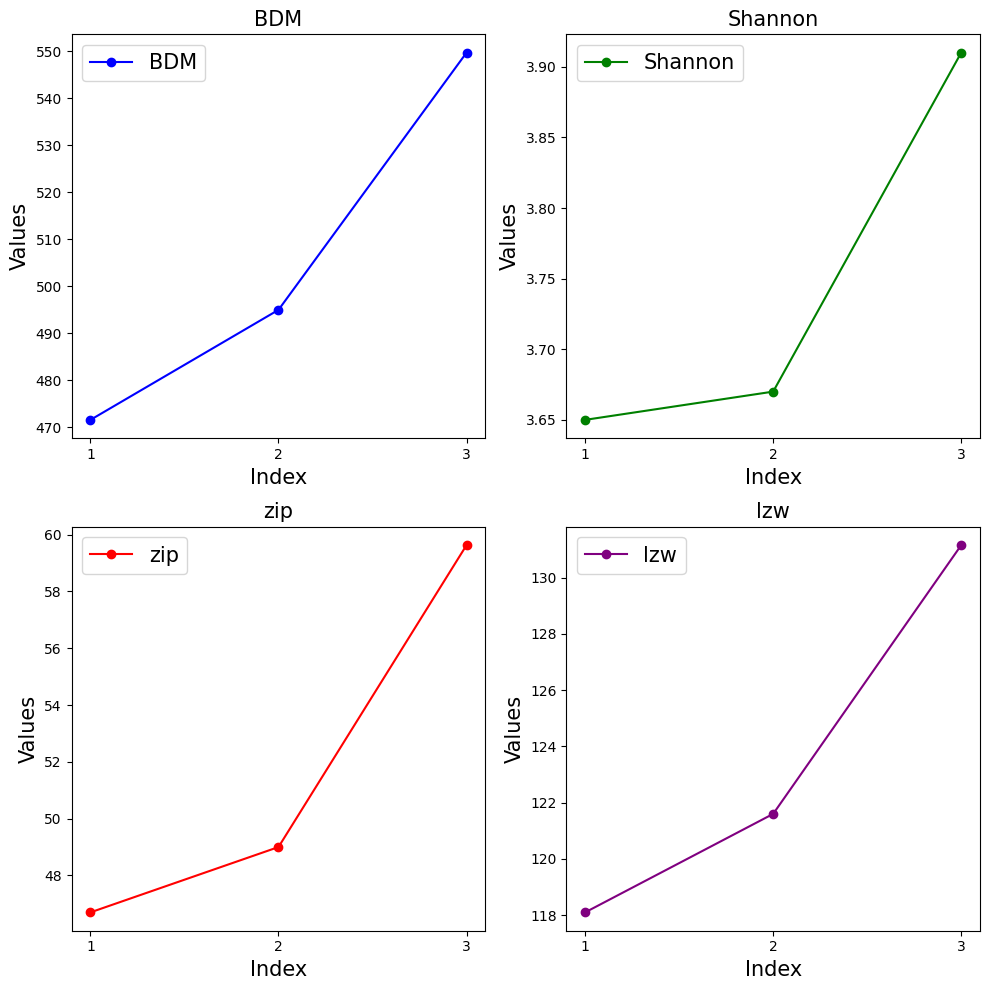

In [15]:
import matplotlib.pyplot as plt
BDM = [471.544, 494.951, 549.678]
Shannon = [3.65, 3.67, 3.91]
zip = [46.7, 49, 59.63]
lzw = [118.1, 121.6, 131.15]

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].plot([1, 2, 3], BDM, label='BDM', color='blue', marker='o')
axs[0, 0].set_title('BDM', fontsize=15)
axs[0, 0].set_xlabel('Index', fontsize=15)
axs[0, 0].set_ylabel('Values', fontsize=15)
axs[0, 0].set_xticks([1, 2, 3])
axs[0, 0].legend(fontsize=15)

axs[0, 1].plot([1, 2, 3], Shannon, label='Shannon', color='green', marker='o')
axs[0, 1].set_title('Shannon', fontsize=15)
axs[0, 1].set_xlabel('Index', fontsize=15)
axs[0, 1].set_ylabel('Values', fontsize=15)
axs[0, 1].set_xticks([1, 2, 3])
axs[0, 1].legend(fontsize=15)

axs[1, 0].plot([1, 2, 3], zip, label='zip', color='red', marker='o')
axs[1, 0].set_title('zip', fontsize=15)
axs[1, 0].set_xlabel('Index', fontsize=15)
axs[1, 0].set_ylabel('Values', fontsize=15)
axs[1, 0].set_xticks([1, 2, 3])
axs[1, 0].legend(fontsize=15)

axs[1, 1].plot([1, 2, 3], lzw, label='lzw', color='purple', marker='o')
axs[1, 1].set_title('lzw', fontsize=15)
axs[1, 1].set_xlabel('Index', fontsize=15)
axs[1, 1].set_ylabel('Values', fontsize=15)
axs[1, 1].set_xticks([1, 2, 3])
axs[1, 1].legend(fontsize=15)

plt.tight_layout()
plt.show()
